In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

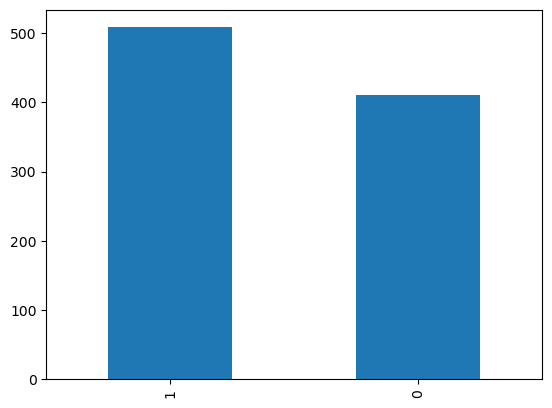

In [6]:
dataset['HeartDisease'].value_counts().plot.bar()

In [7]:
dataset['ExerciseAngina'].unique()


array(['N', 'Y'], dtype=object)

In [8]:

dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [9]:
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [10]:
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [11]:
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [12]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


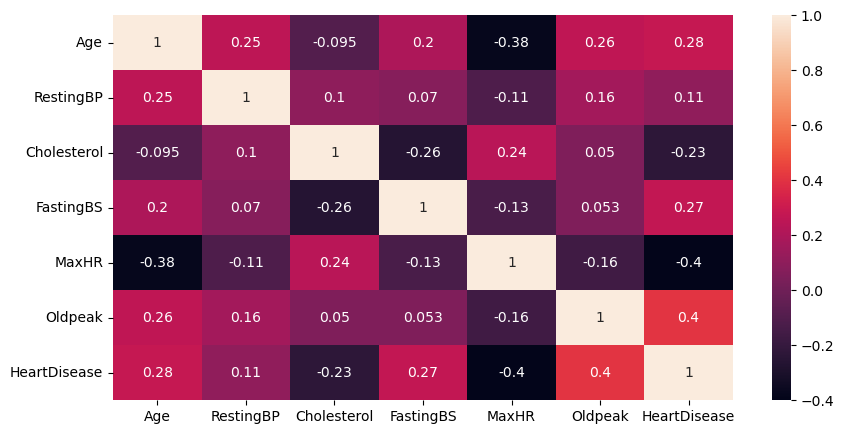

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot = True);

In [14]:
dataset.corr()['HeartDisease']

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [15]:
dataset.drop("MaxHR", axis='columns')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,N,0.0,Flat,1


In [16]:
sns.set_style('darkgrid')

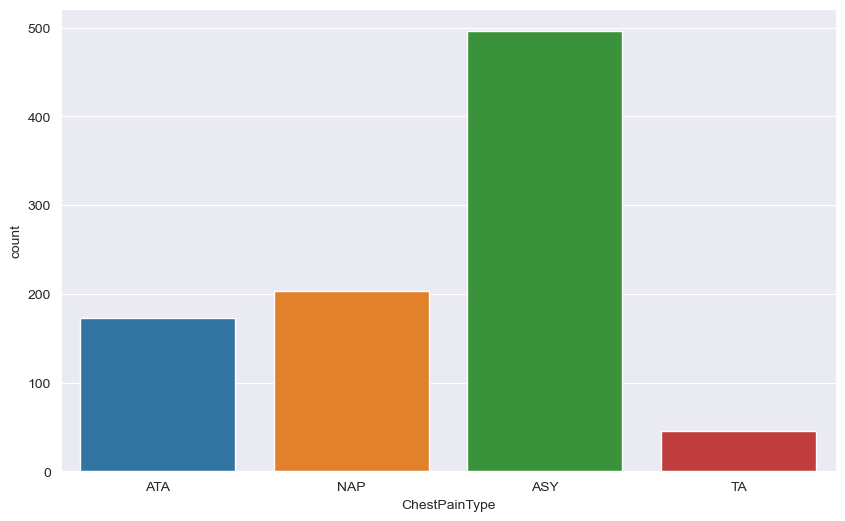

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', data=dataset);

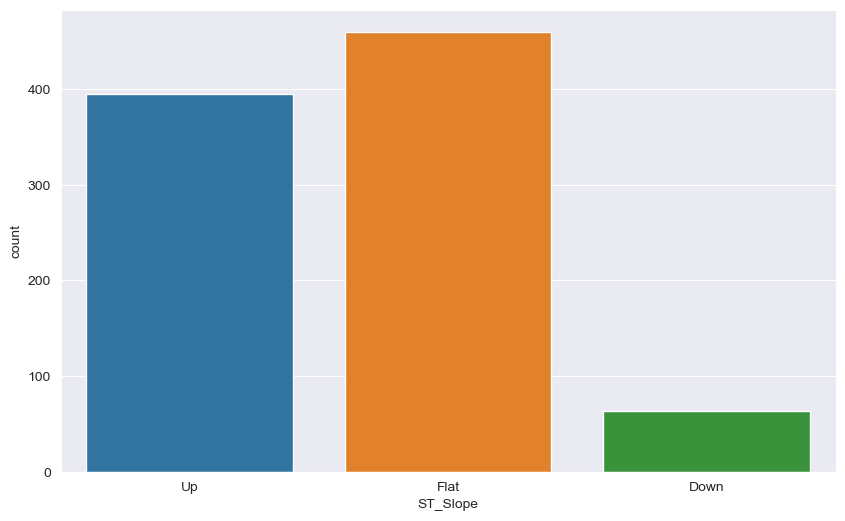

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ST_Slope', data=dataset);

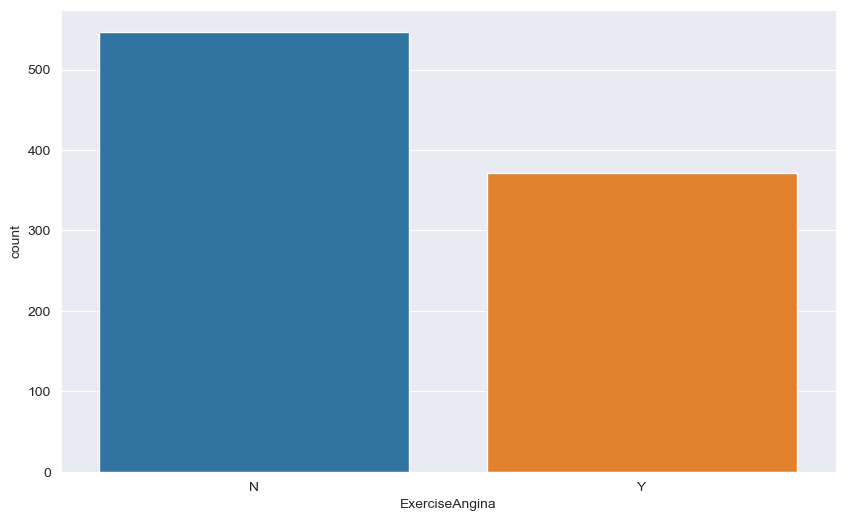

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ExerciseAngina', data=dataset);

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier = GaussianNB()
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [22]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()

In [25]:
enc_data = pd.DataFrame(enc.fit_transform(
    dataset[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]).toarray())

In [26]:
enc.get_feature_names_out()

array(['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up'], dtype=object)

In [27]:
pd.DataFrame(enc.transform([['M', 'ASY', 'LVH', 'N', 'Down']]).toarray())

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [28]:
enc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
X = dataset

In [30]:
X = X.join(enc_data)

In [31]:
X.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], axis = 1, inplace = True)

In [32]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,0,1,2,...,4,5,6,7,8,9,10,11,12,13
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
X = X.drop(columns=['HeartDisease'])
y = dataset['HeartDisease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [34]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,40,140,289,0,172,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
y_train

852    1
121    0
664    1
187    1
108    0
      ..
767    0
72     1
908    1
235    0
37     0
Name: HeartDisease, Length: 734, dtype: int64

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          918 non-null    int64  
 1   RestingBP    918 non-null    int64  
 2   Cholesterol  918 non-null    int64  
 3   FastingBS    918 non-null    int64  
 4   MaxHR        918 non-null    int64  
 5   Oldpeak      918 non-null    float64
 6   0            918 non-null    float64
 7   1            918 non-null    float64
 8   2            918 non-null    float64
 9   3            918 non-null    float64
 10  4            918 non-null    float64
 11  5            918 non-null    float64
 12  6            918 non-null    float64
 13  7            918 non-null    float64
 14  8            918 non-null    float64
 15  9            918 non-null    float64
 16  10           918 non-null    float64
 17  11           918 non-null    float64
 18  12           918 non-null    float64
 19  13      

In [38]:
pipe = Pipeline(steps=[
    ('step1',StandardScaler()),
    ('step2',SVC(kernel = 'linear', random_state = 0))
])

In [39]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 65   9]
 [  8 102]]


0.907608695652174

In [41]:
pipe1 = Pipeline(steps=[
    ('step1',StandardScaler()),
    ('step2',KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2))
])

In [42]:
pipe1.fit(X_train,y_train)
y_pred = pipe1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 64  10]
 [  8 102]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will 

0.9021739130434783

In [43]:
X.drop("Cholesterol",axis=1,inplace = True)

In [44]:
dataset.drop("MaxHR",axis=1,inplace = True)

In [45]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,N,0.0,Flat,1


In [46]:
X = dataset.drop(columns=['HeartDisease'])
y = dataset['HeartDisease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
]
,remainder='passthrough')

In [48]:
pipe10 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2))
])

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
pipe10.fit(X_train,y_train)
y_pred = pipe10.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 68   6]
 [  8 102]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9239130434782609

In [50]:
pickle.dump(pipe10,open('HeartDisease_Prediction_using_KNN10.pkl','wb'))

In [51]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope
900,58,M,ASY,114,318,0,ST,N,4.4,Down
570,56,M,ASY,128,223,0,ST,Y,2.0,Down
791,51,M,ASY,140,298,0,Normal,Y,4.2,Flat
189,53,M,ASY,180,285,0,ST,Y,1.5,Flat
372,63,M,ASY,185,0,0,Normal,Y,0.0,Up
...,...,...,...,...,...,...,...,...,...,...
216,39,M,ASY,110,280,0,Normal,N,0.0,Flat
844,52,M,TA,118,186,0,LVH,N,0.0,Flat
740,54,F,NAP,160,201,0,Normal,N,0.0,Up
107,34,M,ATA,150,214,0,ST,N,0.0,Up


In [52]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)